# Import Libraries

In [22]:
import pandas as pd
import numpy as np



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,scorer,f1_score,precision_score,recall_score
from lightgbm import LGBMClassifier

import _pickle as pickle

from yellowbrick.classifier import DiscriminationThreshold

# Bayesian Optimizer
import time

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier


In [2]:

import warnings
warnings.filterwarnings("ignore")

# Import DataSet for Modelling Preparation 

In [4]:
#path to training dataset
path_to_percustomer_orders_records='./input_data/peruser_order_attributes.csv'



In [5]:
df_peruser_orderdata=pd.read_csv(path_to_percustomer_orders_records)
df_peruser_orderdata.head()

,customer_id,num_restaurant_id_unique,num_city_id_unique,num_platform_id_unique,num_payment_id_unique,num_transmission_id_unique,amount_paid_mean,amount_paid_std,amount_paid_sum,amount_paid_q25,...,platform_id_29751,platform_id_29815,platform_id_30135,platform_id_30199,platform_id_30231,platform_id_30359,platform_id_30391,platform_id_30423,platform_id_525,is_returning_customer
0,000097eabfd9,1,1,1,1,1,11.46960,0.0,11.46960,11.46960,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0
1,0000e2c6d9be,1,1,1,1,1,9.55800,0.0,9.55800,9.55800,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0
2,000133bb597f,1,1,1,1,1,5.93658,0.0,5.93658,5.93658,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1
3,00018269939b,1,1,1,1,1,9.82350,0.0,9.82350,9.82350,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0
4,0001a00468a6,1,1,1,1,1,5.15070,0.0,5.15070,5.15070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df_peruser_orderdata.shape

(245455, 55)

In [8]:
#Distribution of target variable for binary classification

df_peruser_orderdata['is_returning_customer'].value_counts(normalize=True)*100

0    77.386079
1    22.613921
Name: is_returning_customer, dtype: float64

Scaling the numerical values as part of modelling process to converge faster and better

In [9]:

X = df_peruser_orderdata.iloc[:, 1:-1]
y = df_peruser_orderdata.iloc[:, -1]

In [10]:
X.shape

(245455, 53)

In [11]:
y.shape

(245455,)

In [12]:
#Normalize the values
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)


In [ ]:
#Combine the scaled attributes together for training dataset

In [13]:

data_totrain = pd.concat([X_scaled, y], axis=1)

data_totrain.head()

,num_restaurant_id_unique,num_city_id_unique,num_platform_id_unique,num_payment_id_unique,num_transmission_id_unique,amount_paid_mean,amount_paid_std,amount_paid_sum,amount_paid_q25,amount_paid_q75,...,platform_id_29751,platform_id_29815,platform_id_30135,platform_id_30199,platform_id_30231,platform_id_30359,platform_id_30391,platform_id_30423,platform_id_525,is_returning_customer
0,-0.412621,-0.170542,-0.407176,-0.3857,-0.515242,0.114169,-0.443169,-0.302429,0.225501,0.027660,...,-0.142488,-0.475286,-0.02136,-0.052164,2.063434,-0.492021,-0.238225,-0.133524,-0.055904,0
1,-0.412621,-0.170542,-0.407176,-0.3857,-0.515242,-0.215448,-0.443169,-0.329776,-0.114549,-0.280731,...,-0.142488,-0.475286,-0.02136,-0.052164,-0.525142,2.274581,-0.238225,-0.133524,-0.055904,0
2,-0.412621,-0.170542,-0.407176,-0.3857,-0.515242,-0.839890,-0.443169,-0.381583,-0.758754,-0.864961,...,-0.142488,-0.475286,-0.02136,-0.052164,-0.525142,2.274581,-0.238225,-0.133524,-0.055904,1
3,-0.412621,-0.170542,-0.407176,-0.3857,-0.515242,-0.169668,-0.443169,-0.325977,-0.067320,-0.237899,...,-0.142488,-0.475286,-0.02136,-0.052164,-0.525142,2.274581,-0.238225,-0.133524,-0.055904,0
4,-0.412621,-0.170542,-0.407176,-0.3857,-0.515242,-0.975399,-0.443169,-0.392825,-0.898552,-0.991744,...,-0.142488,-0.475286,-0.02136,-0.052164,-0.525142,-0.492021,-0.238225,-0.133524,-0.055904,0


#Split the dataset to train and test using stratify so that we maintain the balance of class distribution in train and test sets.



In [14]:
X = data_totrain.iloc[:, 1:-1]
y = data_totrain.iloc[:, -1]
# Compute train,test matrices with 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,shuffle=True, random_state=130) 



Checking the distribution of records with respect to labelled data.if the splits are balanced or not

In [15]:

y_train.mean(), y_test.mean(), len(y_train), len(y_test)

(0.2261381599317729, 0.2261423636008083, 184091, 61364)

Since its a binary classfication problem with class imbalances the following evaluation metrics should be considered while comparision
- F1 Score
- Roc_AUC
- Precision/Recall
- Accuracy
- Cohen Kappa score



Lets go ahead for building Model Phase


In [20]:
cols=X.columns
#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 

#threshold_plot - if True returns threshold plot for model
    
def to_train(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n")
    print(classification_report(testing_y,predictions))
    print('-----------------------')
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    print('-----------------------')
    print("F1 score:",f1_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print('-----------------------')
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    df_feature_imp=coef_sumry[['features','coefficients']]
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    return df_feature_imp        





# 1.Logistic Regression with Default Model Paramters

In [18]:
logit  = LogisticRegression()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     47487
           1       0.72      0.35      0.47     13877

    accuracy                           0.82     61364
   macro avg       0.78      0.65      0.68     61364
weighted avg       0.81      0.82      0.80     61364

-----------------------
Accuracy   Score :  0.8227462355778632
F1 score: 0.4708343468742399
-----------------------
-----------------------
Area under curve :  0.6549900522415576 



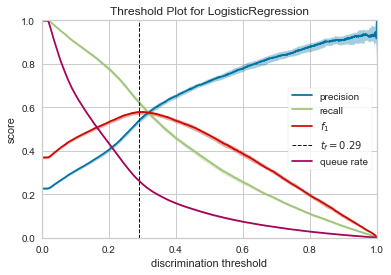

In [21]:

df_featureimp=to_train(logit,X_train,X_test,y_train,y_test,cols,"coefficients",threshold_plot = True)



# 2.Random Forest with Default estimators

In [23]:
rf_c = RandomForestClassifier(random_state = 30)
rf_c.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [24]:
def compute_metrics(rf_c,X_test,y_test):
    predictions   = rf_c.predict(X_test)
    probabilities = rf_c.predict_proba(X_test)
    print('Accuracy score is',accuracy_score(y_test,predictions))
    print('Roc_AUC Curve score is',roc_auc_score(y_test,predictions))
    print('F1 score is',f1_score(y_test, predictions))
    

In [25]:
compute_metrics(rf_c,X_test,y_test)

Accuracy score is 0.8318069226256437
Roc_AUC Curve score is 0.6945064573480724
F1 score is 0.5441053050046379


# 3.Light GBM Classifier 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     47487
           1       0.75      0.44      0.55     13877

    accuracy                           0.84     61364
   macro avg       0.80      0.70      0.73     61364
weighted avg       0.83      0.84      0.82     61364

-----------------------
Accuracy   Score :  0.8397594680920409
F1 score: 0.5534311276624733
-----------------------
-----------------------
Area under curve :  0.6979615971449714 



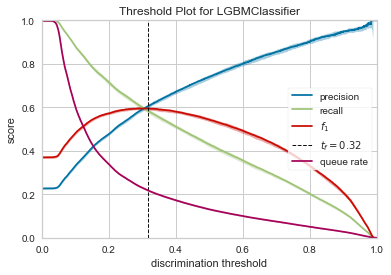

In [27]:
##light gbm classifier is one of the boosting algorithm generally known for faster computation and also good at reducing variance and bias.

lgbm_c=LGBMClassifier()

df_featureimp=to_train(lgbm_c,X_train,X_test,y_train,y_test,cols,"features",threshold_plot = True)

# 4.Xgboost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
df_featureimp=entertainer_churn_prediction(xgb,X_train,X_test,y_train,y_test,cols,"features",threshold_plot = True)
